In [2]:
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, ElasticNet, Lasso, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import LinearSVR, SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import root_mean_squared_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from time import time

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
regressors = {'AdaBoost': AdaBoostRegressor(), 
              'RandomForest': RandomForestRegressor(), 
              'GradientBoosting': GradientBoostingRegressor(), 
              'LinearRegression': LinearRegression(), 
              'Ridge': Ridge(), 
              #'SGD': SGDRegressor(), 
              'ElasticNet': ElasticNet(), 
              'Lasso': Lasso(), 
              'BayesianRidge': BayesianRidge(), 
              #'KernelRidge': KernelRidge(), # Memory overload
              'LinearSVR': LinearSVR(), 
              #'SVR': SVR(), 
              #'Gaussian': GaussianProcessRegressor(), # Memory overload
              #'MLP': MLPRegressor(),
              'LightGBM': LGBMRegressor(),
              'XGBoost': XGBRegressor(),
}

In [4]:
data = pd.read_csv('Data/merged_data.csv')
data = data.fillna(0)

In [5]:
X = data.drop(['salary', 'playerID', 'teamID', ], axis=1)
y = data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
rmse_scores = {}
cv_scores = {}

for name, reg in regressors.items():
    start_time = time()
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    rmse = root_mean_squared_error(y_test, pred)
    rmse_scores[name] = rmse
    cv_rmse = -cross_val_score(reg,X_train,y_train).mean()
    cv_scores[name] = cv_rmse
    end_time = time()
    elapsed_time = end_time - start_time
    print(f"Time taken to fit and evaluate {name}: {elapsed_time:.2f} seconds")

Time taken to fit and evaluate AdaBoost: 7.45 seconds
Time taken to fit and evaluate RandomForest: 227.43 seconds
Time taken to fit and evaluate GradientBoosting: 37.45 seconds
Time taken to fit and evaluate LinearRegression: 0.28 seconds
Time taken to fit and evaluate Ridge: 0.16 seconds


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.506e+16, tolerance: 2.562e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.787e+16, tolerance: 2.045e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.933e+16, tolerance: 2.081e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.723e+16, tolerance: 2.039e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.832e+16, tolerance: 2.070e+13
Objective did n

Time taken to fit and evaluate ElasticNet: 158.18 seconds


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.394e+16, tolerance: 2.562e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.689e+16, tolerance: 2.045e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.846e+16, tolerance: 2.081e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.631e+16, tolerance: 2.039e+13
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.746e+16, tolerance: 2.070e+13
Objective did n

Time taken to fit and evaluate Lasso: 163.60 seconds
Time taken to fit and evaluate BayesianRidge: 0.51 seconds


The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


Time taken to fit and evaluate LinearSVR: 0.96 seconds
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5945
[LightGBM] [Info] Number of data points in the train set: 21143, number of used features: 71
[LightGBM] [Info] Start training from score 2110229.534456
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5902
[LightGBM] [Info] Number of data points in the train set: 16914, number of used features: 70
[LightGBM] [Info] Start training from score 2107167.189606
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM

In [7]:
def plot_scores(scores, score_type = 'RMSE Score'):
    df = pd.DataFrame.from_dict(scores, orient='index', columns=[score_type]).reset_index()
    df = df.rename(columns={'index':'Regressor'}).sort_values(by=score_type, ascending=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(df, x="Regressor", y=score_type)
    plt.xticks(rotation=45)

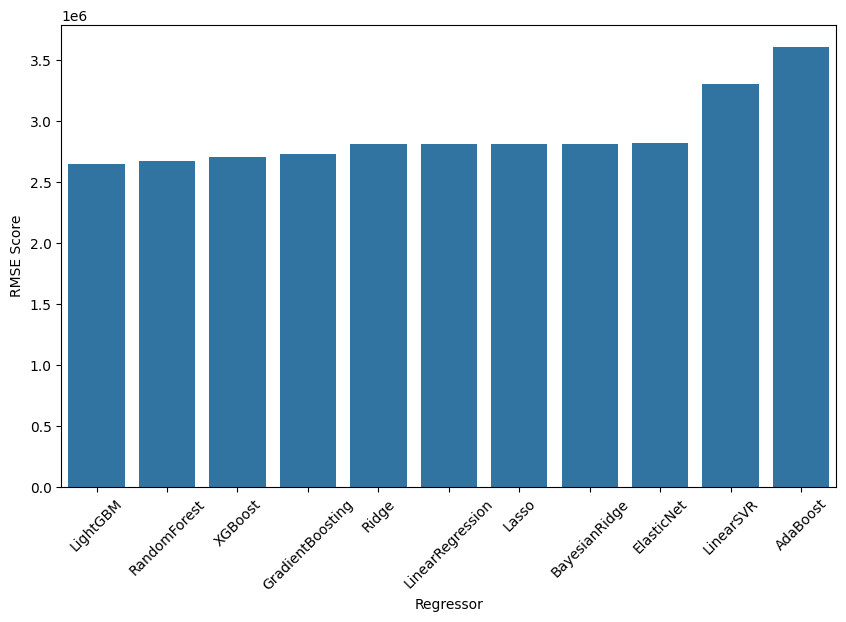

In [8]:
plot_scores(rmse_scores)

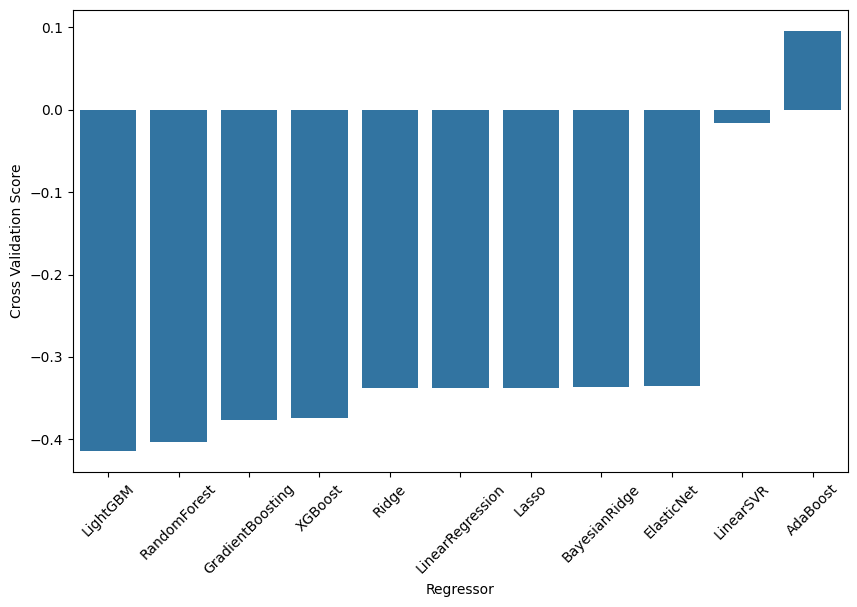

In [9]:
plot_scores(cv_scores, score_type='Cross Validation Score')